In [17]:
import sklearn
#import ipywidgets
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import sklearn.metrics
from tensorflow.keras.utils import plot_model
from IPython.display import Image 

In [ ]:
import scikitplot as skplt


In [18]:
from utils import mnist_loader

In [19]:
def plot_acc_and_score(which_history,which_mlp,which_approach,X_flat_test,y_cate_test):
# plot the training accuracy
    plt.subplot(1,2, 1)
    plt.plot(which_history.history["acc"])
    plt.plot(which_history.history["val_acc"])
    plt.title("Training Accuracy: "+ which_approach)
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")

 

    
    # plot the training loss
    plt.subplot(1,2, 2)
    plt.plot(which_history.history["loss"])
    plt.plot(which_history.history["val_loss"])
    plt.title("Training Loss: "+ which_approach)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")
    
    plt.show()


    # evaluate the model on the test set
    scores = which_mlp.evaluate(x=X_flat_test, y=y_cate_test) 

    # print results
    for name, score in zip(which_mlp.metrics_names, scores):
        print("%s: %g" % (name, score))

In [20]:
def show_img(what_data):
    rows = 4
    cols = 4

    # select several samples from MNIST at random
    indices = np.random.choice(np.arange(len(what_data)), rows * cols)

    # plot the images in a grid
    plt.figure(figsize=(3 * cols, 3 * rows))

    for i in range(rows * cols):
        index = indices[i]
    
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(255-what_data[index], cmap="gray")
        plt.title("label = %d" % y_train[index])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)
60000 28 28
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              12846080  
______________________________________________

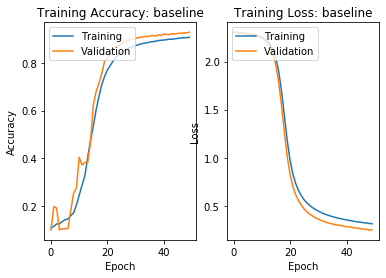

10000/10000 [==============================] - 0s 45us/step
loss: 0.292691
acc: 0.9141


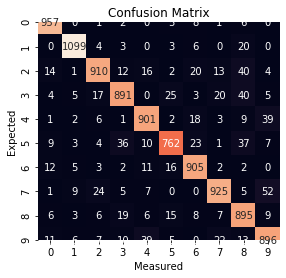

In [22]:

def main():
    
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    print("X_train: %s" % str(X_train.shape))
    print("y_train: %s" % str(y_train.shape))
    print("X_test: %s" % str(X_test.shape))
    print("y_test: %s" % str(y_test.shape))

    print(
    X_train.shape[0],
    X_train.shape[1],
    X_train.shape[2],)
    #show_img(X_train)
    
    # reshape the training and test images into vectors
    X_flat_train = X_train.astype("float32") / 255.
    X_flat_train = X_flat_train.reshape((X_flat_train.shape[0], 28, 28, 1))
    
    

    X_flat_test = X_test.astype("float32") / 255.
    X_flat_test = X_flat_test.reshape((X_flat_test.shape[0], 28, 28, 1))

    
    

    # convert the training and test labels into one-hot labels
    y_cate_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_cate_test = keras.utils.to_categorical(y_test, num_classes=10)
    
    # create a basic convolutional neural network
    cnn = keras.models.Sequential() 
    cnn.add(keras.layers.Conv2D(64, (3,3), padding="same", activation="sigmoid", input_shape=(28,28,1)))
    #cnn.add(keras.layers.Dropout(0.2))
    cnn.add(keras.layers.MaxPooling2D(2, 2))
    cnn.add(keras.layers.Conv2D(256, (3,3), padding="same"))
    #cnn.add(keras.layers.Dropout(0.2))
    cnn.add(keras.layers.MaxPooling2D(2, 2))
    #cnn.add(keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"))
    cnn.add(keras.layers.Flatten())
    cnn.add(keras.layers.Dense(1024, activation="sigmoid"))
    cnn.add(keras.layers.Dense(10, activation="softmax"))
    cnn.summary()
    # compile the model
    plot_model(cnn, to_file='shared_input_layer.png')
    
    cnn.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

    # train the model
    history = cnn.fit(x=X_flat_train, y=y_cate_train, batch_size=500, epochs=50, validation_split=0.1)
    plot_acc_and_score(history,cnn,"baseline",X_flat_test,y_cate_test)
    
    
    # get the raw predictions of the network on the test set
    y_cate_pred = cnn.predict(X_flat_test)

    # convert the one-hot encoded output to class indexes
    y_pred = np.argmax(y_cate_pred, axis=1)

    # TODO: create a confusion matrix from the class predictions (refer to supervised learning notebook)
    classes = [str(i) for i in range(10)]


    cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

    # plot a heatmap of the confusion matrix
    sns.heatmap(cnf_matrix, annot=True, fmt="d", cbar=False, square=True, xticklabels=classes, yticklabels=classes)
    plt.ylabel("Expected")
    plt.xlabel("Measured")
    plt.title("Confusion Matrix")
    plt.show()
    
if __name__ == "__main__":
    main()

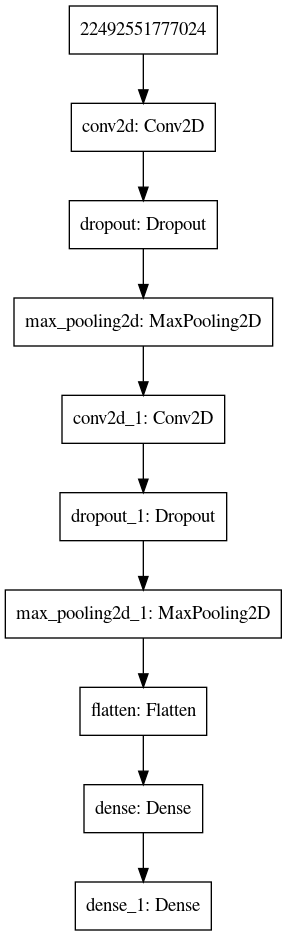

In [6]:
Image('shared_input_layer.png')